In [98]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv as out
ds = pd.read_csv("/Users/noam/train.csv", low_memory=False)
# print(ds)


OCCPP = ds['Occupation']
SSNPP = ds['SSN']
LTuP = ds['Type_of_Loan']
AgePP = ds['Age']
AnnIPP = ds['Annual_Income']
NDPPP = ds['Num_of_Delayed_Payment']
DebtPP = ds['Outstanding_Debt']
PBPP = ds['Payment_Behaviour']
ScorePP = ds['Credit_Score']

In [99]:
def cleanup():
    freq = []
    SSNnD = []
    OCCnD = []
    LTnD = []
    AgeD = []
    AnnID = []
    NDPD = []
    DebtD = []
    PBD = []
    ScoreD = []
    
    j = 0
    counter = 0
    for i in range(len(SSNPP)-1):
        if (SSNPP[i] not in SSNnD) and NDPPP[i] and PBPP[i] != '!@9#%8':
            # Add lists and append for each value, if needed
            SSNnD.append(SSNPP[i])
            OCCnD.append(OCCPP[i])
            LTnD.append(LTuP[i])
            AgeD.append(AgePP[i])
            AnnID.append(AnnIPP[i])
            NDPD.append(NDPPP[i])
            DebtD.append(DebtPP[i])
            PBD.append(PBPP[i])
            ScoreD.append(ScorePP[i])
            j += 1
            counter = 0
            freq.append([0])
        counter += 1
        freq[len(freq) - 1] = counter
    return [freq, SSNnD, OCCnD, LTnD, AgeD, AnnID, NDPD, DebtD, PBD, ScoreD]


Freq, pSSN, pOCC, LTuP, pAge, pAnnI, pNDP, pDebt, pPB, pScore = cleanup()
aOCC = list(OrderedDict.fromkeys(pOCC))
# print("Freq: ",Freq,"Occupation :", pOCC,"SSN: ", pSSN, "All Occupations: ", aOCC)

In [100]:
# Time complexity of O(NM) is slow, but will suffice.
freqTable = []

try:
    aOCC.remove('_______')
except ValueError:
    print("Val NAN not found")

for i in aOCC:
    freqTable.append(0)
    for j in pOCC:
        if (j == i):
            freqTable[len(freqTable) - 1] += 1

# Remove Null values from table.

print("Freq Table: ", freqTable, "  aOCC: ", aOCC)

Freq Table:  [795, 789, 775, 769, 821, 782, 768, 762, 780, 755, 779, 734, 787, 744, 804]   aOCC:  ['Scientist', 'Engineer', 'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Teacher', 'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect']


In [101]:
#Break up LTuP into a 2D array
LTP = []

LoanTypesnD = []

for i in LTuP:
    try:
        LTP.append(str.split(i, ","))
        LTP[-1][-1] = LTP[-1][-1].replace("and", "")
        for i in range(0, len(LTP[len(LTP)-1])):
            LTP[-1][i] = LTP[-1][i].lstrip().rstrip()
            if(LTP[-1][i] not in LoanTypesnD):
                LoanTypesnD.append(LTP[-1][i])
    except TypeError:
        print("Type Error on LTUP Remove And")

print(LTP)


Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error

Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error on LTUP Remove And
Type Error

In [102]:
# Fix numerical variables
# Age
for i in pAge:
    if i[-1]=='_':
        i = i[:-1]
    i = int(i)
# Annual Income
for i in pAnnI:
    if i[-1]=='_':
        i = i[:-1]
    i = float(i)
# Number of Delayed Payments should be fine
# Outstanding Debt
for i in pDebt:
    if i[-1]=='_':
        i = i[:-1]
    i = float(i)

In [112]:
# Fix Payment_Behaviour
pPBArray = []

for i in pPB:
    j = i.split('_')
    pPBArray.append([j[0], j[2]])
print(pPBArray)

[['High', 'Small'], ['High', 'Medium'], ['Low', 'Small'], ['High', 'Small'], ['Low', 'Large'], ['High', 'Medium'], ['High', 'Large'], ['High', 'Medium'], ['Low', 'Large'], ['High', 'Small'], ['High', 'Small'], ['High', 'Medium'], ['High', 'Large'], ['Low', 'Large'], ['Low', 'Large'], ['High', 'Medium'], ['Low', 'Medium'], ['Low', 'Medium'], ['Low', 'Medium'], ['Low', 'Small'], ['Low', 'Small'], ['High', 'Large'], ['High', 'Large'], ['Low', 'Large'], ['High', 'Large'], ['Low', 'Small'], ['Low', 'Small'], ['Low', 'Large'], ['Low', 'Small'], ['High', 'Medium'], ['Low', 'Large'], ['Low', 'Large'], ['High', 'Medium'], ['High', 'Medium'], ['High', 'Medium'], ['High', 'Medium'], ['Low', 'Small'], ['High', 'Small'], ['Low', 'Large'], ['Low', 'Small'], ['Low', 'Small'], ['Low', 'Large'], ['Low', 'Large'], ['Low', 'Small'], ['High', 'Large'], ['High', 'Large'], ['Low', 'Small'], ['High', 'Small'], ['Low', 'Large'], ['High', 'Medium'], ['High', 'Large'], ['Low', 'Large'], ['Low', 'Medium'], ['Low

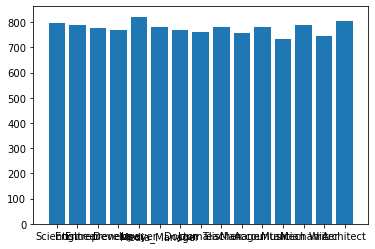

In [103]:
#TODO:
# 1. Convert Loan Types into Mapping using TRUE/FALSE
# 2. Write into Processed Data.xlsx

#out.writer("C:\\Users\\A Name\\CreditColumbiaFinal\\Mapping.csv")

rows = []



try:
    plt.bar(x=aOCC, height=freqTable)
except TypeError:
    print("Type error occured")
finally:
    plt.show()